In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [2]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [3]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


## Problem 1: Line plots

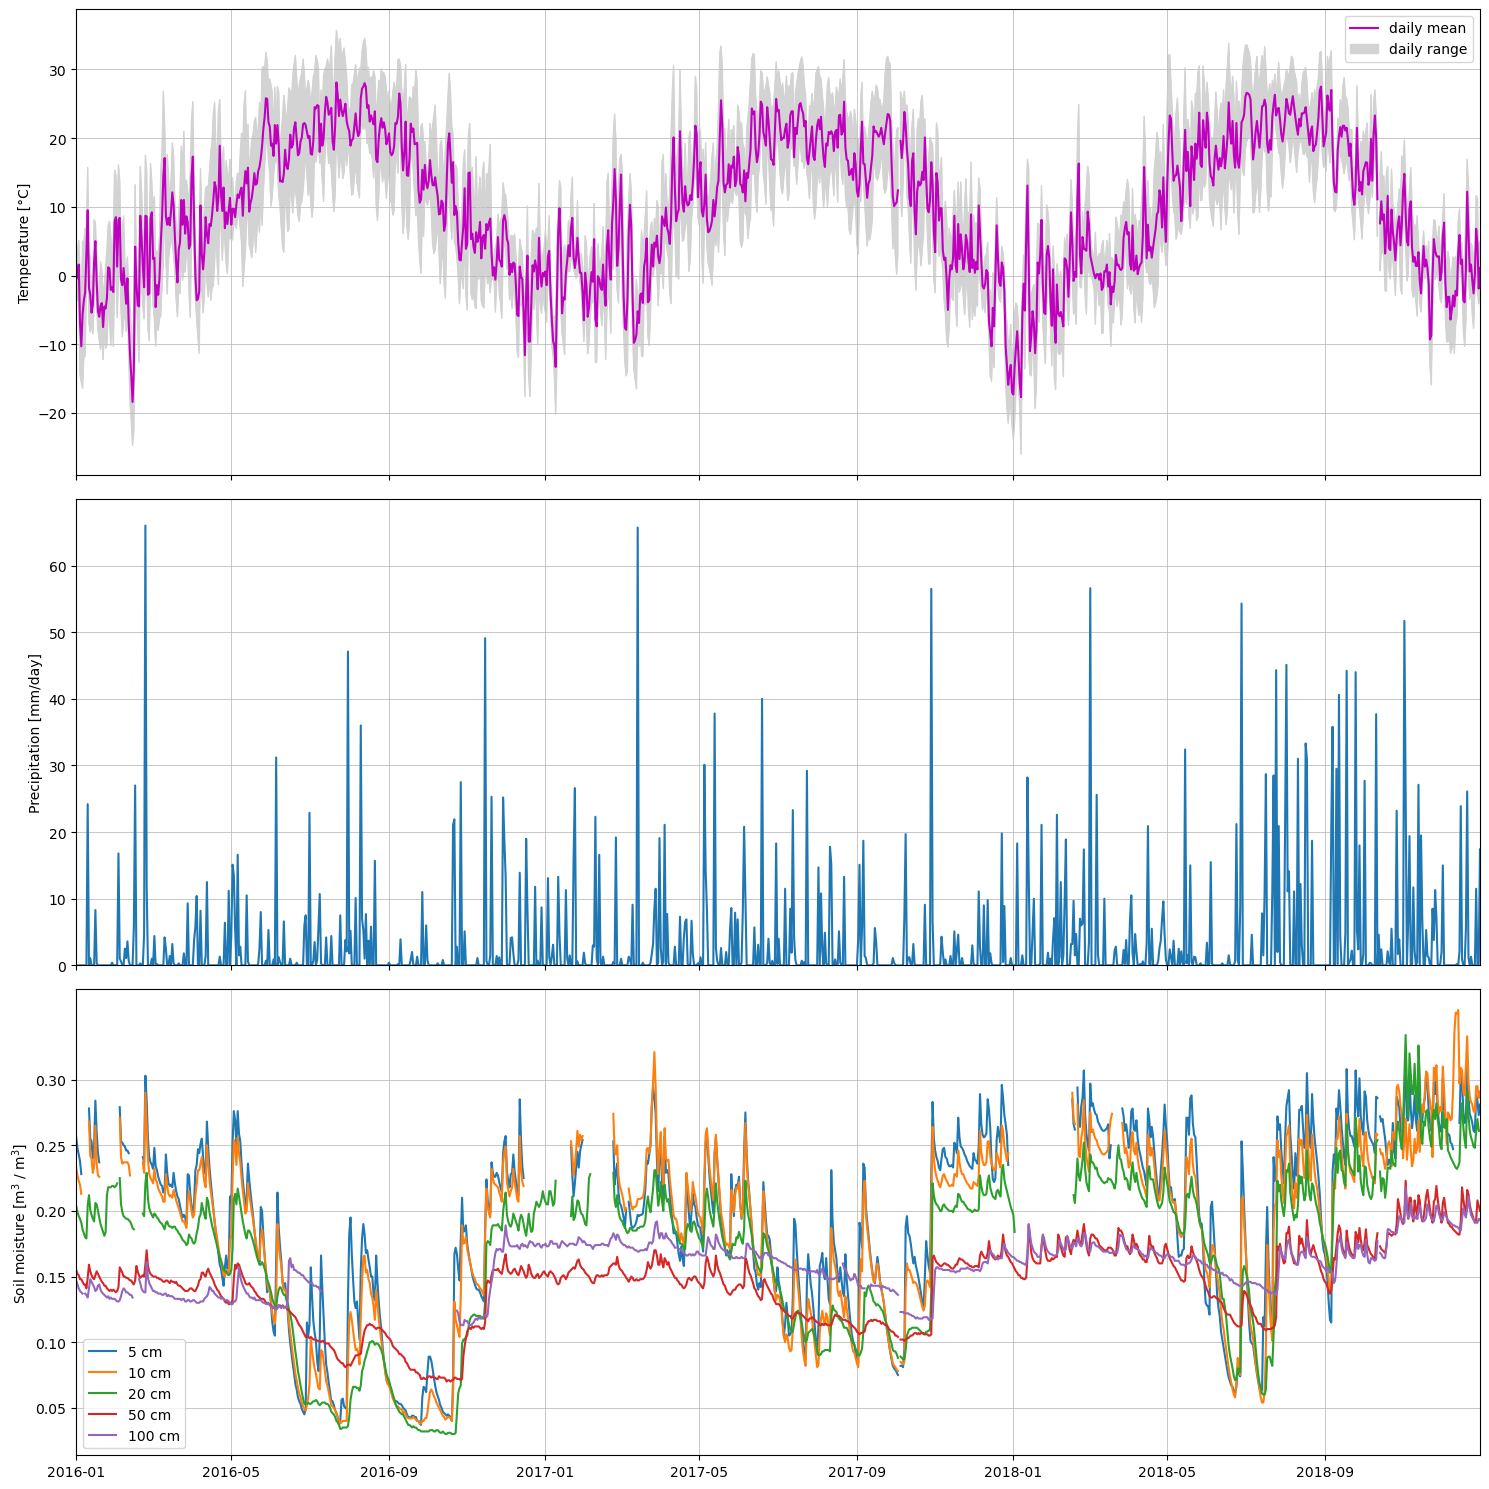

In [4]:
fig, ax = plt.subplots(figsize = (15,15), nrows = 3)

# creating the first plot

# getting the axis and plot setup
ax[0].set_ylabel('Temperature [°C]')
ax[0].set_yticks(np.arange(-40, 40, 10), minor = False)
ax[0].grid(which = 'major', linewidth = 0.5)
ax[0].set_xticklabels([])
ax[0].set_xlim(date[0], date[-1])

# plotting the data
ax[0].plot(date, t_daily_min, color = 'lightgray', linewidth = 0.5)
ax[0].plot(date, t_daily_max, color = 'lightgray', linewidth = 0.5)
ax[0].plot(date, t_daily_mean, color = 'm', label = 'daily mean')
ax[0].fill_between(date, t_daily_min, t_daily_max, color = 'lightgray', label = 'daily range')

# plotting the legend
ax[0].legend(loc = 'upper right')

# creating the second plot

# getting the axis and plot setup
ax[1].set_ylabel('Precipitation [mm/day]')
ax[1].set_yticks(np.arange(0, 70, 10), minor = False)
ax[1].grid(which = 'major', linewidth = 0.5)
ax[1].set_xticklabels([])
ax[1].set_xlim(date[0], date[-1])
ax[1].set_ylim(0,70)

# plotting the data
ax[1].plot(date, p_daily_calc, color = 'tab:blue')

# creating the third plot

# getting the axis and plot setup
ax[2].set_ylabel('Soil moisture [$\mathrm{m^3}$ / $\mathrm{m^3}$]')
ax[2].set_yticks(np.arange(0, 0.35, 0.05), minor = False)
ax[2].grid(which = 'major', linewidth = 0.5)
ax[2].set_xlim(date[0], date[-1])

# plotting the data
ax[2].plot(date, soil_moisture_5, color = 'tab:blue', label = '5 cm')
ax[2].plot(date, soil_moisture_10, color = 'tab:orange', label = '10 cm')
ax[2].plot(date, soil_moisture_20, color = 'tab:green', label = '20 cm')
ax[2].plot(date, soil_moisture_50, color = 'tab:red', label = '50 cm')
ax[2].plot(date, soil_moisture_100, color = 'tab:purple', label = '100 cm')

# plotting the legend
ax[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

## Problem 2: Contour plots

In [5]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


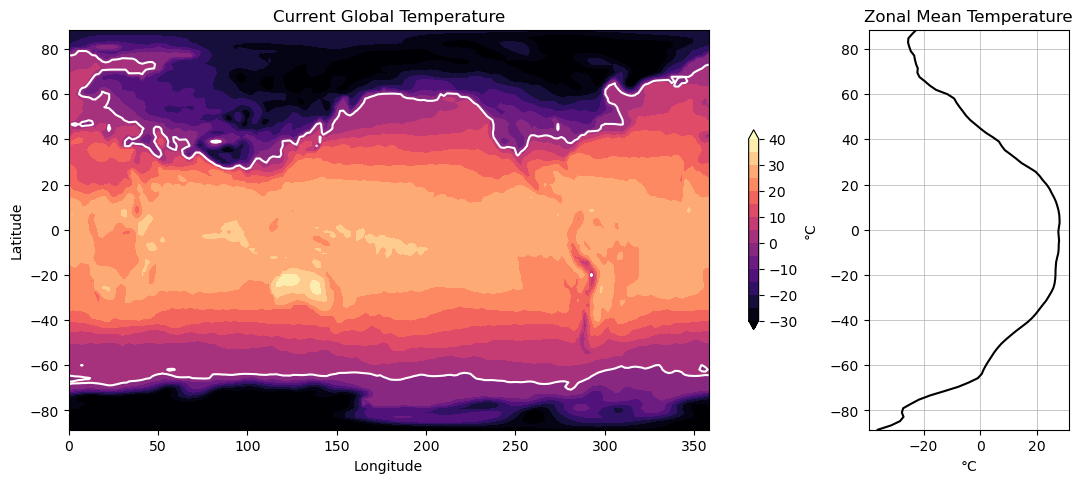

In [6]:
fig = plt.figure(figsize = (10,8))

# setting up the axes
ax1 = fig.add_axes([0,0,0.8, 0.5])
ax1.set_title('Current Global Temperature')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

ax2 = fig.add_axes([0.8,0, 0.2, 0.5])
ax2.set_xlabel('°C')

# plotting the contour map
clevels = np.arange(-30, 45, 5)
plot1 = ax1.contourf(lon, lat, temp, clevels, cmap = 'magma', extend = 'both')
ax1.contour(lon, lat, temp, levels = [0], colors = 'white')
fig.colorbar(plot1, shrink = 0.5, label = '°C')

# plotting the second figure

# have to first calculate zonal mean temperature from this dataset
meanTemp = temp.mean(axis = 1)

# completing the axes
ax2.set_yticks(np.arange(-80, 81, 20), minor = False)
ax2.grid(which = 'major', linewidth = 0.5)
ax2.set_title('Zonal Mean Temperature')
ax2.set_ylim(lat[-1], lat[0])

# plotting the data
ax2.plot(meanTemp, lat, color = 'black')

plt.show()

## Problem 3: Scatter plots

In [7]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

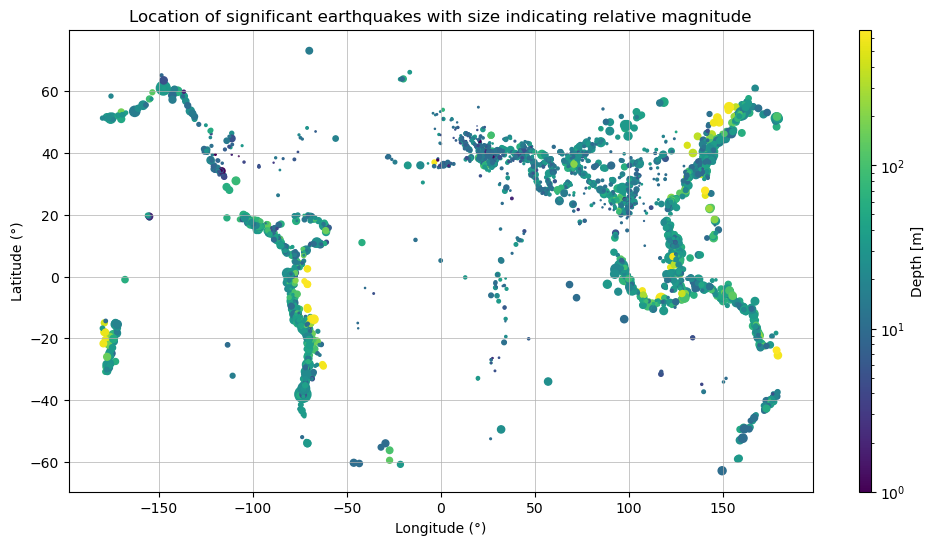

In [8]:
fig, ax = plt.subplots(figsize = (12,6))

# setting up the axes
ax.set_title('Location of significant earthquakes with size indicating relative magnitude')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_yticks(np.arange(-60,65,20), minor = False)
ax.set_xticks(np.arange(-150, 152, 50), minor = False)
ax.grid(which = 'major', linewidth = 0.5)

# plotting the data
# note that I elected to scale the magnitudes by an exponential factor and then divide by 100 just to get the sizes of the dots to be more
# clearly different (as they are in the reference plot).
plot = ax.scatter(longitude, latitude, c = depth, s = np.exp(magnitude)/100, norm = colors.LogNorm())
fig.colorbar(plot, label = 'Depth [m]', aspect = 40)

plt.show()